## Content

#### 1. Import Modules 
#### 2. Import Data
#### 3. Explore Data
#### 4. Baseline: Naive Bayes on BOW
#### 5. Word2Vec
#### 6. Mean of Words Model
#### 7. LSTM
#### 8. LSTM with Hyp Opt
#### 9. Train Final Model

### 1. Import Modules

In [1]:
import pickle
import tensorflow as tf

In [2]:
import src.process as process
import src.explore as explore
import src.model as model

### 2. Import Data

##### Import and merge raw data into one dataframe

In [3]:
start_yr = 2016
end_yr = 2020
path_blueprint = r'raw\data_{}.xlsx'
raw_data = process.merge_import_from_xlsx(start_yr, end_yr, path_blueprint)

#### Clean and Select relevant data for the classification task

<AxesSubplot:xlabel='Politikbereich'>

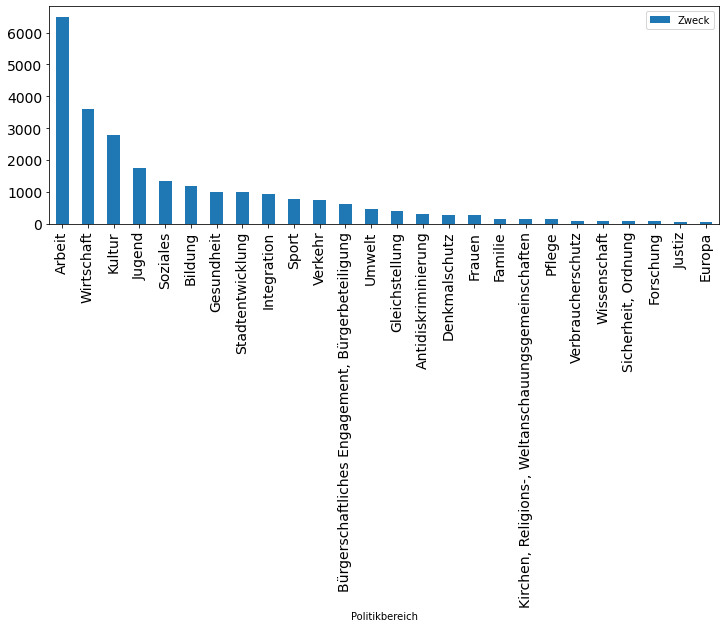

In [4]:
data = process.select_clean_data(raw_data, min_instances = 50)
explore.class_frequency(data)

#### Split data into train and test set

In [6]:
train_data, test_data = process.stratified_train_test_split(data)

### 3. Explore Data

#### Plot class frequencies in training dataset

<AxesSubplot:xlabel='Politikbereich'>

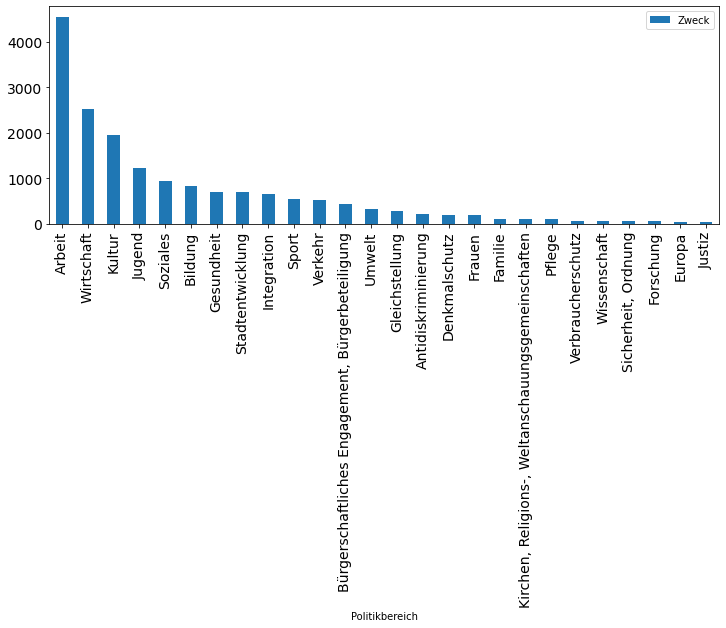

In [8]:
explore.class_frequency(train_data)

#### Plot word frequencies for some classes

In [9]:
tokenized_train_data = process.tokenize(train_data)

<AxesSubplot:title={'center':'Wortfrequenz im Politikbereich "Arbeit"'}, xlabel='Wort'>

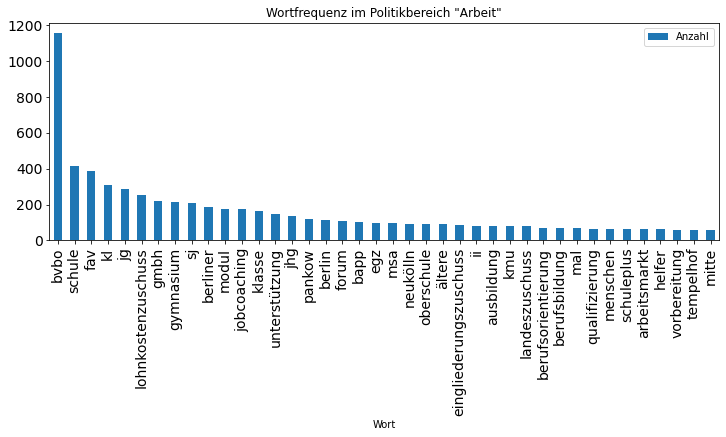

In [10]:
explore.word_frequency(tokenized_train_data, category = 'Arbeit')

<AxesSubplot:title={'center':'Wortfrequenz im Politikbereich "Bildung"'}, xlabel='Wort'>

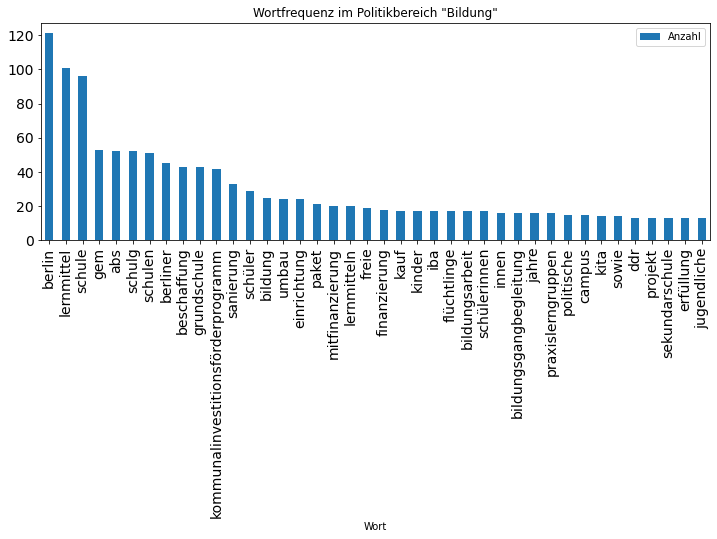

In [11]:
explore.word_frequency(tokenized_train_data, category = 'Bildung')

<AxesSubplot:title={'center':'Wortfrequenz im Politikbereich "Umwelt"'}, xlabel='Wort'>

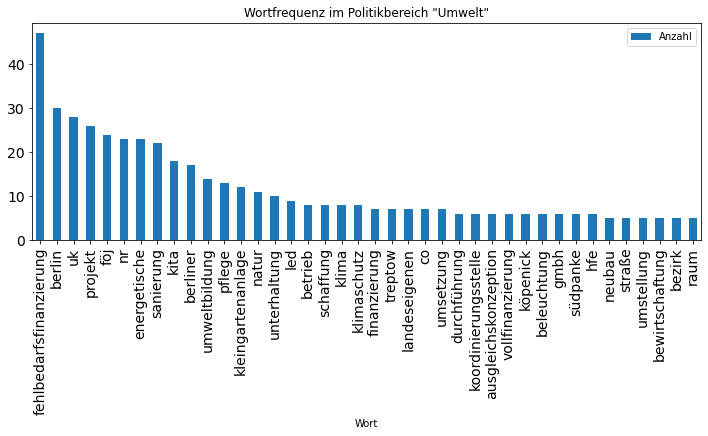

In [12]:
explore.word_frequency(tokenized_train_data, category = 'Umwelt')

### 4. Baseline: Naive Bayes on BOW

In [13]:
nb, performance = model.naive_bayes_bow_model(train_data, tokenized = False, test = True)

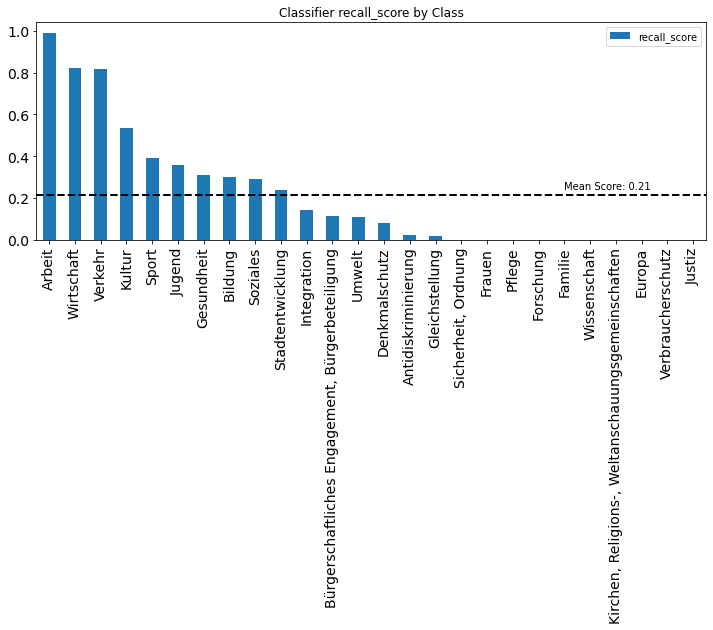

In [14]:
model.plot_performance(performance, score = 'recall_score')

### 5. Word2Vec

In [ ]:
tokenized_train_data = process.tokenize(train_data)
lookup_table = model.create_w2v_lookup(tokenized_train_data, window_size = 5, negative_samples = 20, embedding_dim = 128)

In [ ]:
pickle.dump(lookup_table, open(r"assets/lookup.pkl", "wb" ))

###  6. Mean of Words Model

In [25]:
lookup_table = pickle.load(open(r"assets/lookup.pkl", "rb" ))

C:\Users\gmoha\OneDrive\Desktop\LearningJourney\Projects\berlinExpenditureClassification\src\process.py:188: RuntimeWarning: Mean of empty slice.
  mean_model_data['mean_word_vector'] = mean_model_data['vectorized_sentence'].apply(lambda row: np.array(lookup_table.iloc[row]['vector'].tolist()).mean(axis = 0))


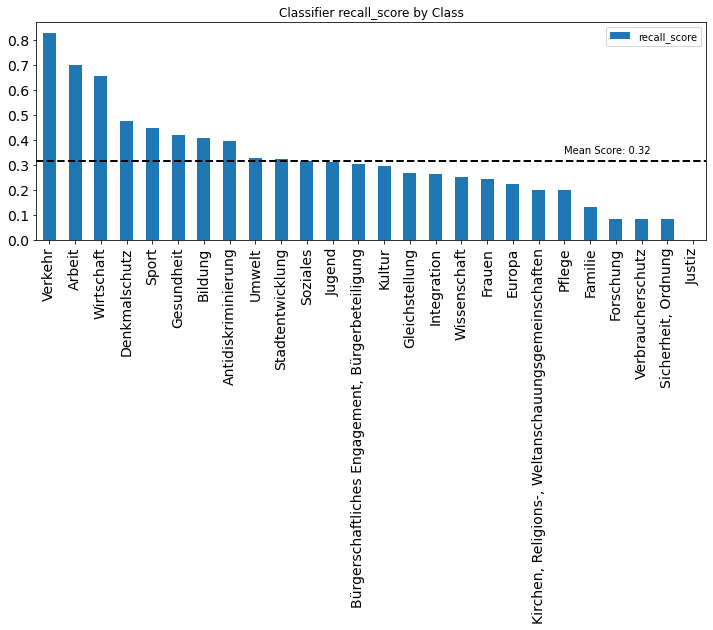

In [26]:
clf, performance = model.mean_word_model(train_data, lookup_table, test = True, dim_reduction = False)
model.plot_performance(performance, score = 'recall_score')

#### Mean of Words with Dimensionality Reduction

C:\Users\gmoha\OneDrive\Desktop\LearningJourney\Projects\berlinExpenditureClassification\src\process.py:188: RuntimeWarning: Mean of empty slice.
  mean_model_data['mean_word_vector'] = mean_model_data['vectorized_sentence'].apply(lambda row: np.array(lookup_table.iloc[row]['vector'].tolist()).mean(axis = 0))


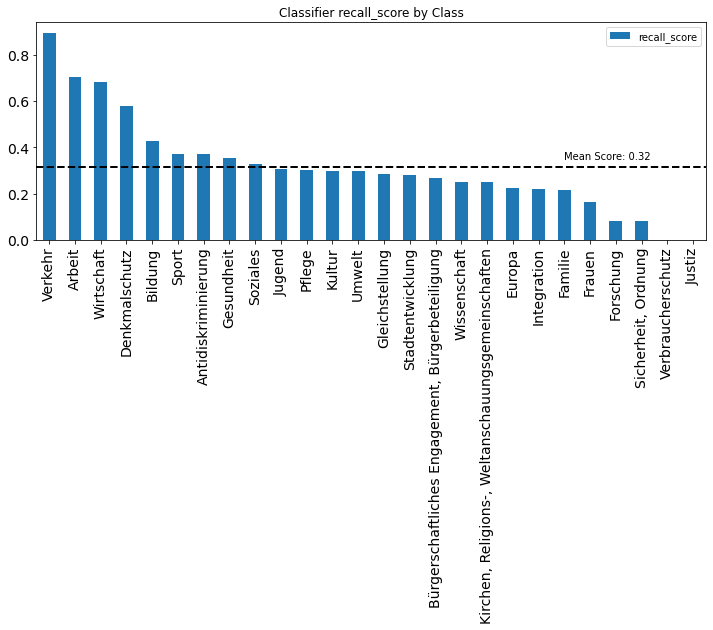

In [27]:
clf_dim_red, performance_dim_red = model.mean_word_model(train_data, lookup_table, test = True, dim_reduction = True)
model.plot_performance(performance_dim_red, score = 'recall_score')

###  7. LSTM

##### Initial Hyperparameters:
num_units: 200,
dropout: 0.1,
recurrent_dropout: 0.1,
activation: softmax,
optimizer: adam.

In [6]:
lookup_table = pickle.load(open( r"assets/lookup.pkl", "rb" ))

In [7]:
lstm, lstm_classes, performance_lstm = model.lstm_model(train_data, lookup_table, num_units = 200, dropout = 0.1, rec_dropout = 0.1, activation = 'softmax', optimizer = 'adam', test=True)

Epoch 1/1000
13/13 [==============================] - 15s 984ms/step - loss: 2.8878 - categorical_accuracy: 0.2422 - f1_score: 0.0177 - val_loss: 2.5851 - val_categorical_accuracy: 0.2667 - val_f1_score: 0.0171
Epoch 2/1000
13/13 [==============================] - 13s 982ms/step - loss: 2.5104 - categorical_accuracy: 0.2685 - f1_score: 0.0220 - val_loss: 2.4262 - val_categorical_accuracy: 0.3027 - val_f1_score: 0.0299
Epoch 3/1000
13/13 [==============================] - 13s 1s/step - loss: 2.2847 - categorical_accuracy: 0.3318 - f1_score: 0.0392 - val_loss: 2.1134 - val_categorical_accuracy: 0.3910 - val_f1_score: 0.0586
Epoch 4/1000
13/13 [==============================] - 14s 1s/step - loss: 2.0640 - categorical_accuracy: 0.4076 - f1_score: 0.0711 - val_loss: 1.9872 - val_categorical_accuracy: 0.4217 - val_f1_score: 0.0793
Epoch 5/1000
13/13 [==============================] - 14s 1s/step - loss: 1.9654 - categorical_accuracy: 0.4293 - f1_score: 0.0943 - val_loss: 1.9020 - val_catego

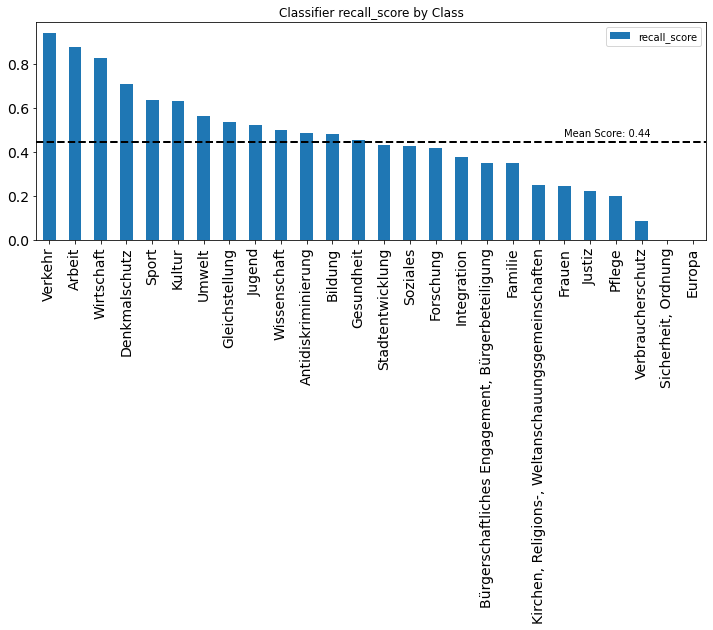

In [9]:
model.plot_performance(performance_lstm, score = 'recall_score')

###  8. LSTM with Hyp Opt

#####  Hyperparameters after Optimization:
num_units: 500,
dropout: 0.3,
recurrent_dropout: 0.0,
activation: relu,
optimizer: adam.

In [8]:
lookup_table = pickle.load(open(r"assets/lookup.pkl", "rb" ))

In [9]:
lstm, lstm_classes, performance_lstm = model.lstm_model(train_data, lookup_table, num_units = 500, dropout = 0.3, rec_dropout = 0, activation = 'relu', optimizer = 'adam', test=True)

Epoch 1/1000
13/13 [==============================] - 41s 3s/step - loss: 3.0298 - categorical_accuracy: 0.2450 - f1_score: 0.0195 - val_loss: 2.8618 - val_categorical_accuracy: 0.2750 - val_f1_score: 0.0218
Epoch 2/1000
13/13 [==============================] - 35s 3s/step - loss: 2.6337 - categorical_accuracy: 0.3018 - f1_score: 0.0307 - val_loss: 2.4814 - val_categorical_accuracy: 0.3310 - val_f1_score: 0.0347
Epoch 3/1000
13/13 [==============================] - 38s 3s/step - loss: 2.3602 - categorical_accuracy: 0.3535 - f1_score: 0.0435 - val_loss: 2.1997 - val_categorical_accuracy: 0.3737 - val_f1_score: 0.0523
Epoch 4/1000
13/13 [==============================] - 40s 3s/step - loss: 2.1651 - categorical_accuracy: 0.3958 - f1_score: 0.0640 - val_loss: 2.0950 - val_categorical_accuracy: 0.4137 - val_f1_score: 0.0710
Epoch 5/1000
13/13 [==============================] - 39s 3s/step - loss: 2.0560 - categorical_accuracy: 0.4265 - f1_score: 0.0941 - val_loss: 1.9340 - val_categorical_

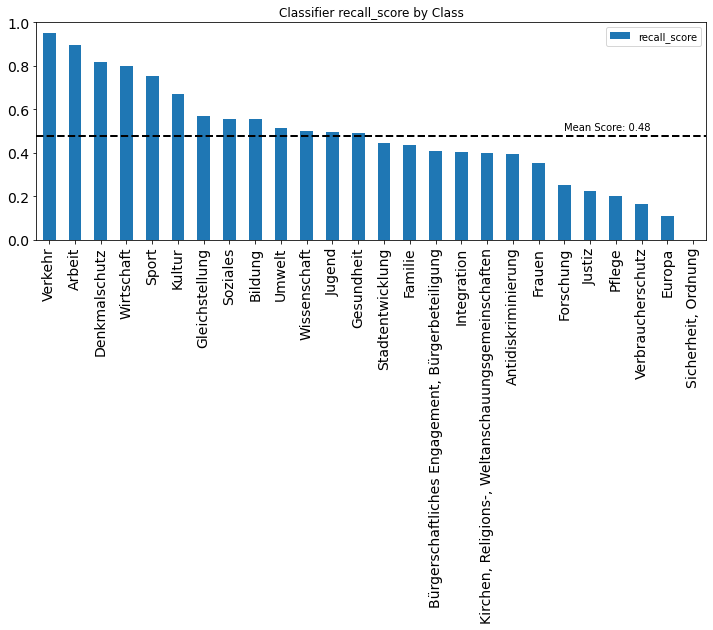

In [10]:
model.plot_performance(performance_lstm, score = 'recall_score')

###  9. Train Final Model

In [6]:
lookup_table = pickle.load(open(r"assets/lookup.pkl", "rb" ))

In [11]:
lstm_final, lstm_classes_final = model.lstm_model(train_data, lookup_table, num_units = 500, dropout = 0.3, rec_dropout = 0, activation = 'relu', optimizer = 'adam', test=False)

Epoch 1/60
17/17 [==============================] - 49s 3s/step - loss: 2.8186 - categorical_accuracy: 0.2683 - f1_score: 0.0289
Epoch 2/60
17/17 [==============================] - 47s 3s/step - loss: 2.2813 - categorical_accuracy: 0.3694 - f1_score: 0.0577
Epoch 3/60
17/17 [==============================] - 50s 3s/step - loss: 2.0736 - categorical_accuracy: 0.4088 - f1_score: 0.0854
Epoch 4/60
17/17 [==============================] - 49s 3s/step - loss: 1.9226 - categorical_accuracy: 0.4460 - f1_score: 0.1162
Epoch 5/60
17/17 [==============================] - 49s 3s/step - loss: 1.8238 - categorical_accuracy: 0.4746 - f1_score: 0.1579
Epoch 6/60
17/17 [==============================] - 52s 3s/step - loss: 1.7383 - categorical_accuracy: 0.5008 - f1_score: 0.2024
Epoch 7/60
17/17 [==============================] - 51s 3s/step - loss: 1.6626 - categorical_accuracy: 0.5280 - f1_score: 0.2327
Epoch 8/60
17/17 [==============================] - 50s 3s/step - loss: 1.6019 - categorical_accu

In [14]:
pickle.dump(lstm_classes_final, open(r"assets/trained_model_classes.pkl", "wb"))

In [15]:
lstm_final.save(r"assets/trained_model.h5")